In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/data.csv')
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,Onesize,wallets/lino-perros/lino-perros-women-peach-co...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",wallets,lino-perros,467,36
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops/mast--harbour/mast--harbour-men-nav...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",flip-flops,mast--harbour,715,55
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,"S,M,L,XL,XXL,3XL",kurtas/biba/biba-women-off-white--black-printe...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurtas,biba,400,20
3,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,"7-8Y,8-9Y,9-10Y",tshirts/anthrilo/anthrilo-girls-white-floral-p...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tshirts,anthrilo,60,10
4,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,"S,M,L,XL",kurta-sets/fashion-dwar/fashion-dwar-women-mul...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurta-sets,fashion-dwar,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146435 entries, 0 to 167991
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   product_name      146435 non-null  object 
 1   brand_name        146435 non-null  object 
 2   rating            146435 non-null  float64
 3   rating_count      146435 non-null  int64  
 4   marked_price      146435 non-null  int64  
 5   discounted_price  146435 non-null  int64  
 6   sizes             146435 non-null  object 
 7   product_link      146435 non-null  object 
 8   img_link          146435 non-null  object 
 9   product_tag       146435 non-null  object 
 10  brand_tag         146435 non-null  object 
 11  discount_amount   146435 non-null  int64  
 12  discount_percent  146435 non-null  int64  
 13  product_id        146435 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 16.8+ MB


In [15]:
df.describe()

,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent,product_id
count,146435.000000,146435.000000,146435.000000,146435.000000,146435.000000,146435.000000,1.464350e+05
mean,2.315824,123.660860,2526.860819,1533.301390,993.559429,37.150934,1.546286e+07
std,2.097524,818.470833,2438.533029,1843.259341,1235.798618,24.593112,3.335010e+06
min,0.000000,0.000000,50.000000,49.000000,0.000000,0.000000,3.825000e+03
25%,0.000000,0.000000,1299.000000,679.000000,210.000000,15.000000,1.425219e+07
50%,3.600000,6.000000,1999.000000,1014.000000,702.000000,40.000000,1.649007e+07
75%,4.300000,34.000000,2999.000000,1749.000000,1317.000000,59.000000,1.782894e+07
max,5.000000,55900.000000,113999.000000,45900.000000,68400.000000,91.000000,1.879781e+07


In [16]:
df.isnull().sum()

product_name        0
brand_name          0
rating              0
rating_count        0
marked_price        0
discounted_price    0
sizes               0
product_link        0
img_link            0
product_tag         0
brand_tag           0
discount_amount     0
discount_percent    0
product_id          0
dtype: int64

#### this dataset is totally clean

### 1. How many unique products are there in the dataset? (5 marks)
You need to find product ID of each product from product_link and then find the number of unique product ids

In [4]:
# Finding Unique Products as per their Product ID
df['product_id'] = [int(product_link.split('/')[-2]) for product_link in df['product_link']]

# Removing Products with Duplicate Product ID
df = df.drop_duplicates(subset=['product_id'])

df.head()
len(df)

146435

### 2. What is the average rating of the products? (2 mark)

In [5]:
# Products with no rating given (0 rating will also be included)
print(df['rating'].mean())

# Product with rating given (0 rating is not included)
print(df[df['rating_count'] != 0.0]['rating'].mean()) 

2.3158240857718444
4.1678571867510605


### 3. What is the average discount percentage of the products? (1 mark)

In [6]:
df['discount_percent'].mean()

37.15093386144023

### 4. What are the top 5 most expensive products? (2 marks)

In [7]:
# Make sure that there can be multiple brands with same name so you can take brand ID also into considration

df.groupby('product_name').mean()['discounted_price'].sort_values(ascending = False).head()

C:\Users\dell\AppData\Local\Temp\ipykernel_17288\2787511592.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('product_name').mean()['discounted_price'].sort_values(ascending = False).head()


product_name
Lord Krishna Showpiece              45599.0
Airwrap Complete Hair Styler        44900.0
Mid-Rise Stretchable Jeans          41000.0
Printed Carpets                     40350.0
Men Brass Dial & Automatic Watch    40050.0
Name: discounted_price, dtype: float64

#### lord krishna showpiece are most expensive product

### 5. What are the top 10 brands by the number of products in the dataset? (2 mark)

<Axes: xlabel='brand_name'>

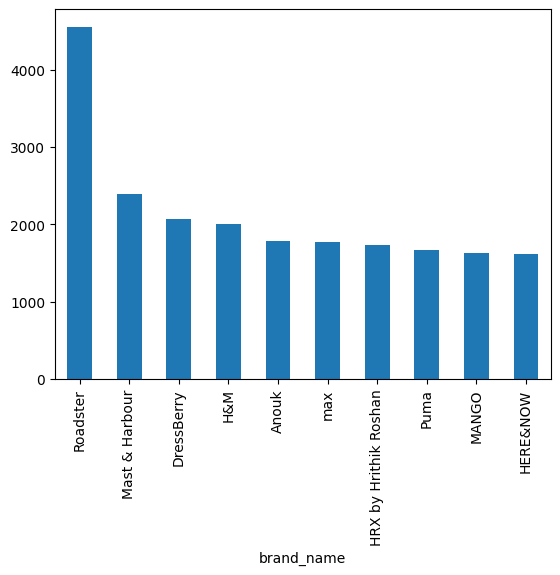

In [8]:
df.groupby('brand_name').size().sort_values(ascending = False).head(10).plot(kind = 'bar')

#### Roadster ,mast & harbour  ,dressberry are the top brands  that people likes most 

### 6. List top 5 brands with Maxiumum average rating of products? (2 marks)
Neglect the products which are not reviewed by any person i.e where rating_count is zero

In [9]:
df[df['rating_count'] != 0.0].groupby('brand_name').mean()['rating'].sort_values(ascending = False).head()

C:\Users\dell\AppData\Local\Temp\ipykernel_17288\2832833454.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['rating_count'] != 0.0].groupby('brand_name').mean()['rating'].sort_values(ascending = False).head()


brand_name
1 Stop Fashion          5.0
Heel & Buckle London    5.0
Cetaphil                5.0
Joseph Joseph           5.0
Jove                    5.0
Name: rating, dtype: float64

#### 1 Stop Fashion ,Heel & Buckle London ,Cetaphil these brands with maximum avereage rating on their products mean people are very much trust on theri product so they can come again and again to by there product 

### 7. Plot a histogram of the distribution of ratings. (3 marks)

<Axes: xlabel='rating', ylabel='Count'>

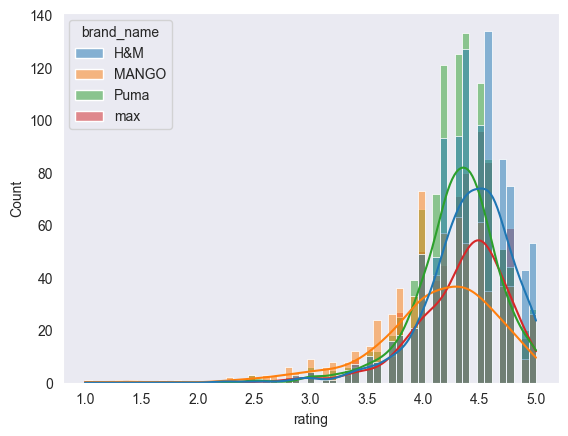

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

brands = ['H&M', 'max', 'Puma', 'MANGO']
ratings_df = df[['brand_name', 'rating','rating_count']]
ratings_df = ratings_df[ratings_df['brand_name'].isin(brands)]

ratings_df = ratings_df[ratings_df['rating_count'] != 0]

sns.set_style('dark')

sns.histplot(data = ratings_df, x = "rating", kde = True, hue = 'brand_name')

### 8. What is the distribution of discounts by brand? (2 marks)

<Axes: xlabel='discount_percent', ylabel='Count'>

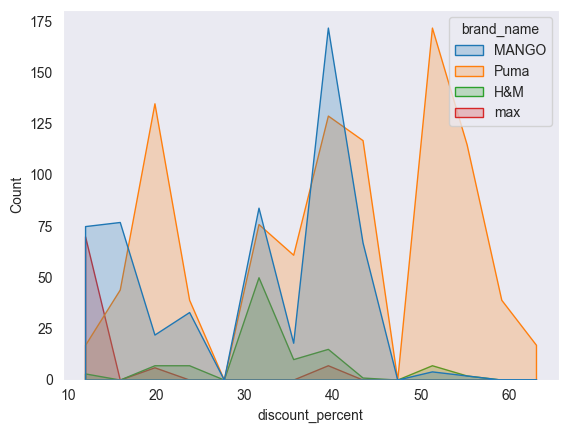

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

brands = ['H&M', 'max', 'Puma', 'MANGO']
ratings_df = df[['brand_name', 'discount_percent', 'rating_count']]
ratings_df = ratings_df[ratings_df['brand_name'].isin(brands)]

ratings_df = ratings_df[ratings_df['rating_count'] != 0]
ratings_df = ratings_df[ratings_df['discount_percent'] != 0]

sns.set_style('dark')

sns.histplot(data = ratings_df, x = "discount_percent", element = "poly", hue = 'brand_name')

### 9. Is there any trend you can find between discount percent and rating of the product? (3 marks)

C:\Users\dell\AppData\Local\Temp\ipykernel_17288\2439002395.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data = df.groupby('discount_percent').mean()['rating'], markers=True, alpha = .8)


<Axes: xlabel='discount_percent', ylabel='rating'>

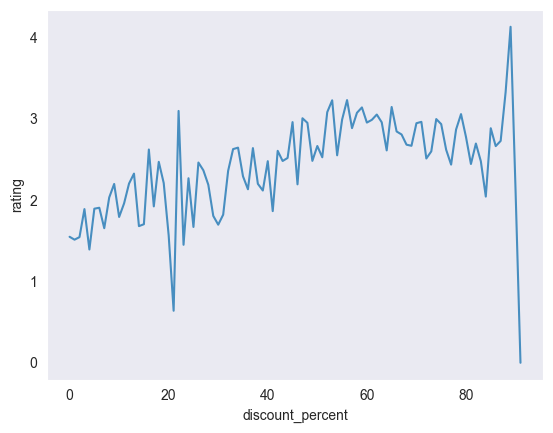

In [12]:
sns.lineplot(data = df.groupby('discount_percent').mean()['rating'], markers=True, alpha = .8)

#### when the product discount is around 85 percent at that time rating will increase rapidly 

### 10. What are the top 10 most popular tags in the dataset? (2 marks)

<Axes: xlabel='product_tag'>

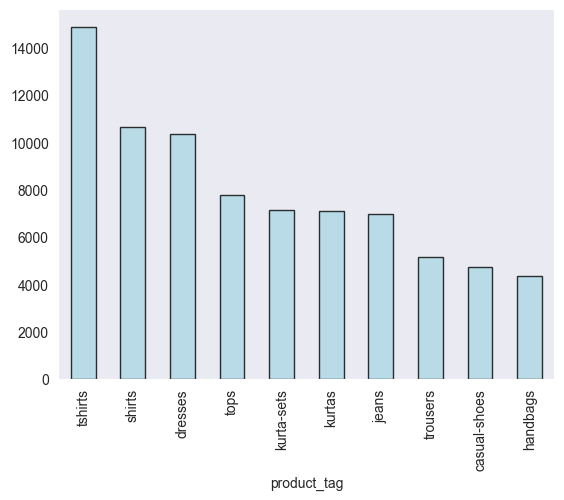

In [13]:
df.groupby('product_tag').size().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                                              color = 'lightblue',
                                                                              edgecolor = 'black',
                                                                              alpha = .8)

### 11. Are there any correlations between the rating, and number of people who rated the products? (4 marks)

<AxesSubplot: xlabel='rating_count', ylabel='rating'>

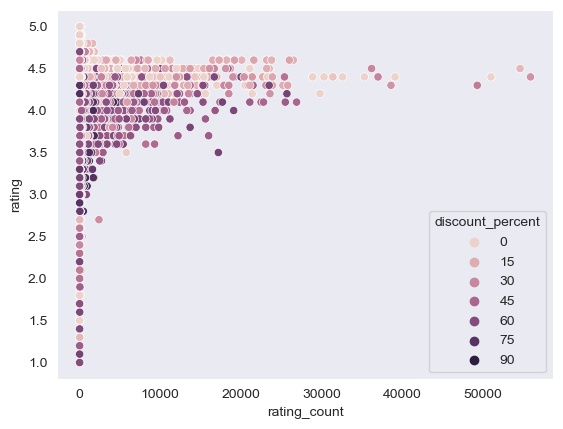

In [417]:
df_pr = df[df['rating'] != 0]
df_pr = df_pr[df_pr['rating_count'] != 0]

sns.scatterplot(x="rating_count", y="rating", data = df_pr, hue = 'discount_percent')

##### yes , Product which have high rating most of the people love to buy this product as we can see in this graph above 4 rating their are lot of rating counts 

### 12. What are the top 10 Most Expensive brands with highest average price of products? (3 marks)

<AxesSubplot: xlabel='brand_name'>

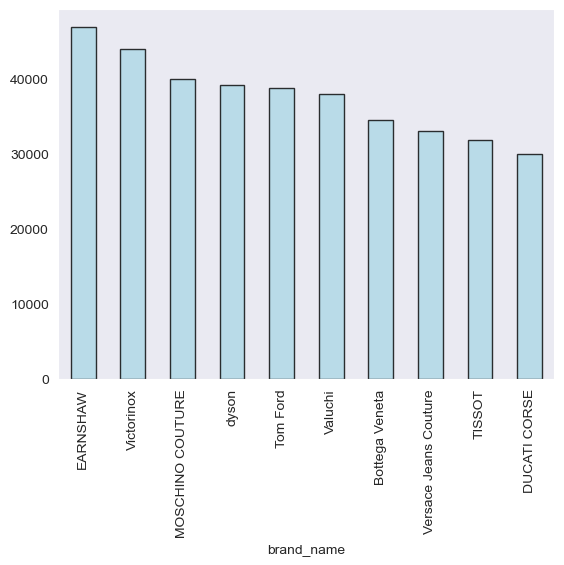

In [187]:
df.groupby('brand_name').mean()['marked_price'].sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                                              color = 'lightblue',
                                                                              edgecolor = 'black',
                                                                              alpha = .8)

### 13. What are the top 10 Most Expensive Product Category with average price of products? (3 marks) ? (4 marks)

<AxesSubplot: xlabel='product_tag'>

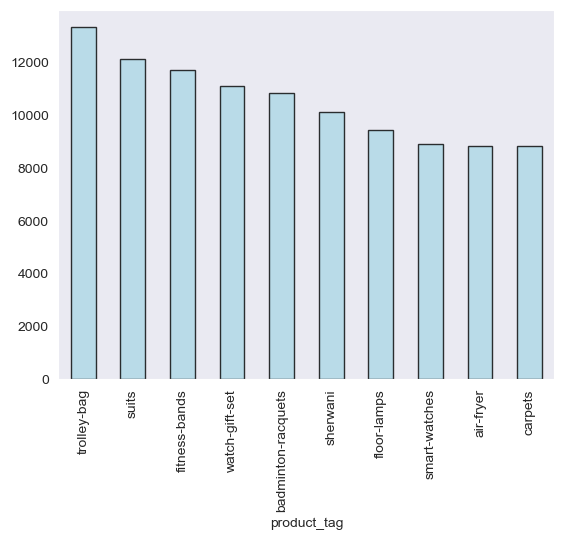

In [190]:
df.groupby('product_tag').mean()['marked_price'].sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                                              color = 'lightblue',
                                                                              edgecolor = 'black',
                                                                              alpha = .8)

### 14. Analyse the Violen Plot of watches of following brands fossil, tommy-hilfiger, daniel-wellington, armani-exchange, emporio-armani, earnshaw & tissot ? (5 marks)

 - Take Marked Price for Reference
 - Take product_tag as watches
 - Take brand_tag as fossil, tommy-hilfiger, daniel-wellington, armani-exchange, emporio-armani, earnshaw, tissot
 - Make sure to write your inference based on the violen plot of following watch brands price

<AxesSubplot: xlabel='marked_price', ylabel='brand_tag'>

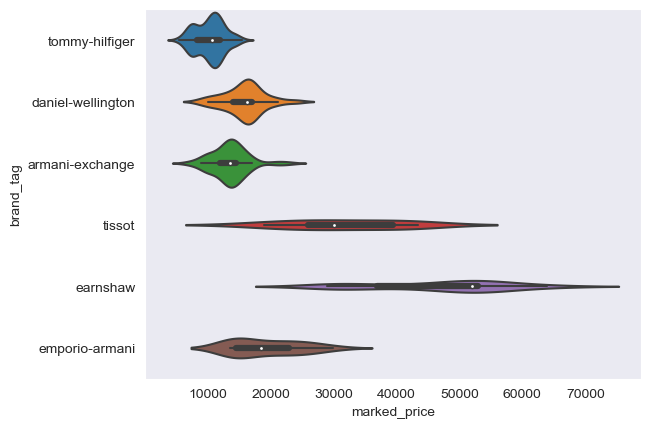

In [254]:
df_pr = df[['product_tag','marked_price','brand_tag']]
df_pr = df_pr[df_pr['product_tag'].isin(['watches'])]
df_pr = df_pr[df_pr['brand_tag'].isin([ 'tommy-hilfiger', 'daniel-wellington', 'armani-exchange', 'emporio-armani',
                                       'earnshaw' , 'tissot'])]

sns.violinplot(data = df_pr, x = "marked_price", y="brand_tag", width = .9)

##### as we  can see in the voilen plot tissot  and earnshaw brand covered the whole market as low and high range of price but tommy hilfiger ,daniel-welliing ton ,armani exchange covered the low range price of market very deeply 

### 15. List top 5 brands which are having most wide range or products as per their marked_price.

In [388]:
groups = df.groupby('brand_tag')

df_pr = groups['marked_price'].agg([np.max, np.min]).reset_index()
df_pr['diff'] = abs(df_pr['amax'] - df_pr['amin'])

df_pr.sort_values(by = 'diff', ascending = False).head(5)['brand_tag'].values

array(['ecraftindia', 'ddecor', 'calvin-klein', 'd1-milano', 'masaba'],
      dtype=object)